# Kaggle Heart Disease Classification
This notebook represents my initial attempt at creating classification predictions for the Heart Disease UCI competition on Kaggle. It is linked here: https://www.kaggle.com/ronitf/heart-disease-uci 

In [1]:
# Python package importing 
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as skpp
from sklearn import metrics
import numpy as np

In [2]:
# Global variable declarations
source_csv_file_path = 'C:\\Users\\vandy\\OneDrive\\Documents\\GitHub\\Kaggle_heart_dis_prediction\\data\\heart.csv'

## Data Import

In [3]:
# Source data import into frame
heart_frame = pd.read_csv(source_csv_file_path)

# Frame dimensions
print('The number of columns in the dataset: ', heart_frame.shape[1])
print('The number of rows in the dataset: ', heart_frame.shape[0])

The number of columns in the dataset:  14
The number of rows in the dataset:  303


In [4]:
# Frame print out
heart_frame.style

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


## Data Quality Checks

In [5]:
# Nulls
heart_frame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Column data types
heart_frame.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Duplicate checks
duplicateRowsDF = heart_frame[heart_frame.duplicated()]
duplicateRowsDF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Source Data Visualizations

[Text(0.5, 1.0, 'Age Distribution')]

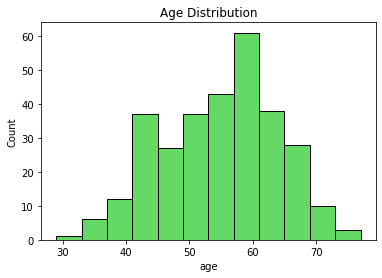

In [8]:
sb.histplot(heart_frame['age'], color='limegreen').set(title='Age Distribution')

[Text(0.5, 1.0, 'Sex Distribution')]

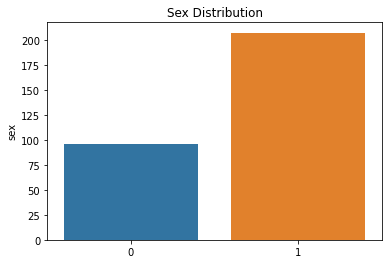

In [9]:
# note that sex distribution is biased
target_counts = heart_frame['sex'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Sex Distribution')

[Text(0.5, 1.0, 'Chest Pain Distribution')]

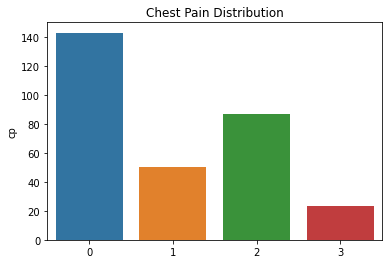

In [10]:
target_counts = heart_frame['cp'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Chest Pain Distribution')

[Text(0.5, 1.0, 'Resting BP Distribution')]

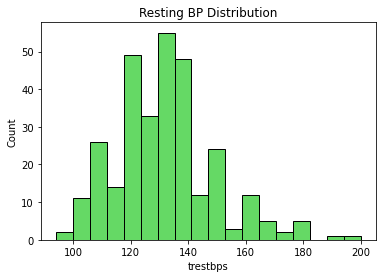

In [11]:
sb.histplot(heart_frame['trestbps'], color='limegreen').set(title='Resting BP Distribution')

[Text(0.5, 1.0, 'Serum Cholestoral Distribution')]

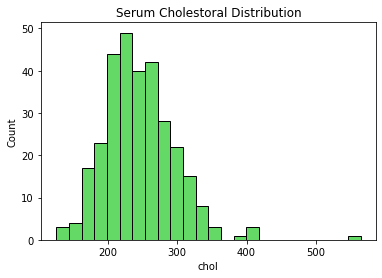

In [12]:
sb.histplot(heart_frame['chol'], color='limegreen').set(title='Serum Cholestoral Distribution')

[Text(0.5, 1.0, 'Fasting Blood Sugar > 120 mg/dL Distribution')]

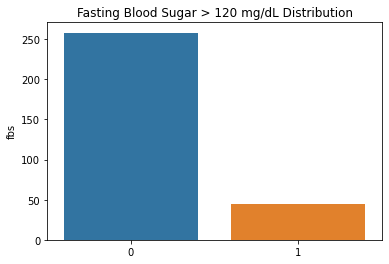

In [13]:
target_counts = heart_frame['fbs'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Fasting Blood Sugar > 120 mg/dL Distribution')

[Text(0.5, 1.0, 'Resting Cardiograph Results')]

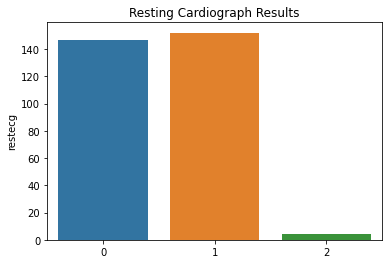

In [14]:
target_counts = heart_frame['restecg'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Resting Cardiograph Results')

[Text(0.5, 1.0, 'Max Heart Rate Distribution')]

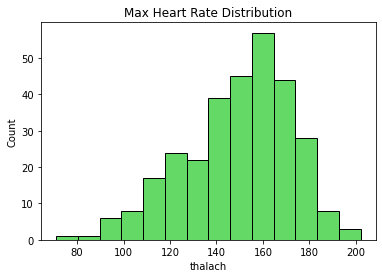

In [15]:
sb.histplot(heart_frame['thalach'], color='limegreen').set(title='Max Heart Rate Distribution')

[Text(0.5, 1.0, 'Exercised Induced Angina Distribution')]

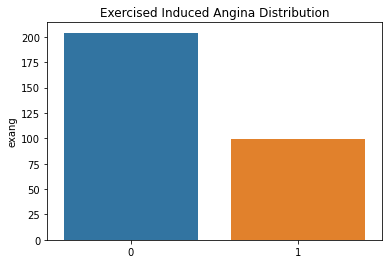

In [16]:
target_counts = heart_frame['exang'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Exercised Induced Angina Distribution')

[Text(0.5, 1.0, 'Oldpeak Distribution')]

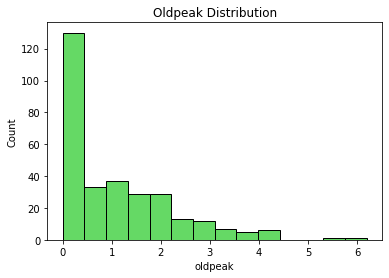

In [17]:
sb.histplot(heart_frame['oldpeak'], color='limegreen').set(title='Oldpeak Distribution')

[Text(0.5, 1.0, 'ST Slope Distribution')]

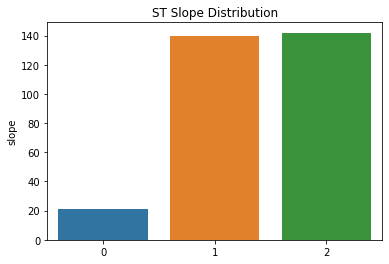

In [18]:
target_counts = heart_frame['slope'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='ST Slope Distribution')

[Text(0.5, 1.0, 'Major Vessel Count Distribution')]

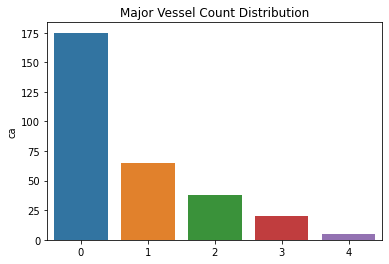

In [19]:
target_counts = heart_frame['ca'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Major Vessel Count Distribution')

[Text(0.5, 1.0, 'Thal Distribution')]

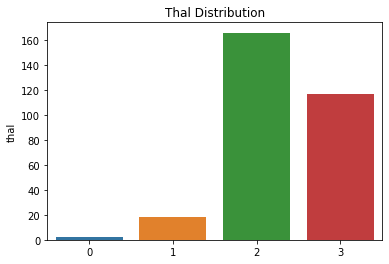

In [20]:
target_counts = heart_frame['thal'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Thal Distribution')

[Text(0.5, 1.0, 'Target Distribution')]

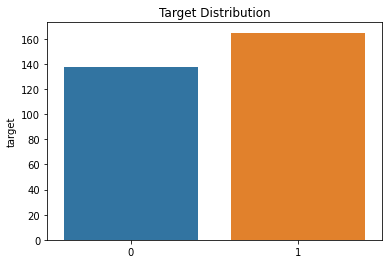

In [21]:
target_counts = heart_frame['target'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Target Distribution')

In [22]:
# train test split
y = heart_frame['target']
X = heart_frame.loc[:, heart_frame.columns != 'target']

X_scaled = skpp.StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=72)

In [23]:
# create logistic regression object
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_prob = lr.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [25]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (21+33) / (5+2+21+33) ) * 100 = 88.52% test accuracy

array([[21,  2],
       [ 5, 33]], dtype=int64)

In [26]:
lrcv = LogisticRegressionCV(max_iter = 10000)
lrcv.fit(X_train, Y_train)

LogisticRegressionCV(max_iter=10000)

In [27]:
y_prob = lrcv.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [28]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (21+36) / (2+2+21+36) ) * 100 = 93.44% test accuracy

array([[21,  2],
       [ 2, 36]], dtype=int64)

In [29]:
rcv = RidgeClassifierCV()
rcv.fit(X_train, Y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))

In [30]:
y_pred = rcv.predict(X_test)

In [31]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (21+36) / (2+2+21+36) ) * 100 = 93.44% test accuracy

array([[21,  2],
       [ 2, 36]], dtype=int64)

In [32]:
sgdc = SGDClassifier()
sgdc.fit(X_train, Y_train)

SGDClassifier()

In [33]:
y_pred = sgdc.predict(X_test)

In [34]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (22+27) / (22+27+11+1) ) * 100 = 80.32% test accuracy

array([[21,  2],
       [ 7, 31]], dtype=int64)

In [35]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)

KNeighborsClassifier()

In [36]:
y_pred = knc.predict(X_test)

In [37]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (20+31) / (20+31+7+3) ) * 100 = 83.6% test accuracy

array([[20,  3],
       [ 7, 31]], dtype=int64)

In [38]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [39]:
y_pred = svc.predict(X_test)

In [40]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (21+35) / (21+35+2+3) ) * 100 = 91.8% test accuracy

array([[21,  2],
       [ 3, 35]], dtype=int64)

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(X_test)

In [43]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix # ( (21+32) / (21+32+6+2) ) * 100 = 86.88% test accuracy

array([[21,  2],
       [ 6, 32]], dtype=int64)

In [44]:
# it appears support vector, log reg w/cv, and ridge cv are our best 3 models. Will move forward with those